# **Machine Learning - case: peso de peixe**

**Importando as bibliotecas necessárias**

In [1]:
import sklearn
import pandas as pd
import numpy as np
# para ignorar os avisos de mensagens das funções
import warnings
warnings.filterwarnings("ignore")

# pacote para trabalhar com data frame (tabelas)
import pandas as pd
# pacote mais básico para vizualização gráfica
import matplotlib.pyplot as plt
# um dos pacotes para fazer gráficos
import seaborn as sns
# sklearn - pacote análise de dados
# existe grande parte dos métodos mais famosos
from sklearn.model_selection import train_test_split
# função para fazer avaliação dos modelos
from sklearn.metrics import classification_report

#### **Explicação da base de dados**

* **Base de dados**: refere-se a dados sobre características de peixes como tamanho, largura, diâmetro, etc.
  * <u>Species</u> - nome da espécie do peixe;
  * <u>Weigh</u> - peso do peixe em gramas;
  * <u>Length1</u> - comprimento vertical em cm;
  * <u>Length2</u> - comprimento diagonal em cm;
  * <u>Length3</u> - comprimento da cruz em cm;
  * <u>Height</u> - altura em cm;
  * <u>Width</u> - largura diagonal em cm.
* **Objetivo**: estimar o peso do peixes a partir das características (variáveis explicativa / preditoras).
  * A variável resposta será: Weigh.
* **Técnica usada**: modelos de machine learnig, regressão linear, regressão polinomial, regressão ridge, regressão lasso, regressão elasticnet, etc.

#### **Carregando os dados**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estagio_TAO_Python/Datasets/Fish.csv', sep = ",")

# tamanho da base de dados
df.shape

(159, 7)

In [4]:
# vizualizando as cinco primeiras linhas da base de dados
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


**Informações sobre os tipos das variáveis da base de dados**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

Verificamos que os dados são do tipo float (reais) e temos dados de sete espécie de peixe.

#### **Arrumando os dados**

Quantidade de dados por espécie

In [7]:
geral = pd.DataFrame([df['Species'].value_counts(normalize = False), df['Species'].value_counts(normalize = True)]).T
geral.columns = ['valor', 'proporção']
geral

,valor,proporção
Perch,56.0,0.352201
Bream,35.0,0.220126
Roach,20.0,0.125786
Pike,17.0,0.106918
Smelt,14.0,0.088050
Parkki,11.0,0.069182
Whitefish,6.0,0.037736


A espécie com maior quantidade de dados é a Perch com 35.22%, e que a que tem menos daos é a Whitefish com 3.77%. Isso mostra que as espécies não são igualmente proporcionais em quantidade de dados na base de dados.

**Transformando as variáveis categóricas em numéricas**

Neste passo transformamos a variável referente a espécie em sete variáveis binárias, onde em cada coluna a espécie respectiva recebe valor um e as demais valor zero.

In [8]:
# tranformando a variável categórica 'Species' em variáveis binárias
df = pd.concat([df, pd.get_dummies(df.Species)], axis = 1)
df.drop(['Species'], axis = 1, inplace= True)

In [9]:
df.head(5)

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


#### Análise descritiva dos dados

Valores das estatísticas básicas das variáveis da base de dados.

In [10]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486,0.220126,0.069182,0.352201,0.106918,0.125786,0.088050,0.037736
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,0.415640,0.254566,0.479165,0.309986,0.332656,0.284263,0.191159
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**correlação entre as variáveis**

In [11]:
corr = df.corr(method = 'spearman')
corr.style.background_gradient(cmap='coolwarm')

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
Weight,1.000000,0.956571,0.958990,0.964101,0.858628,0.970369,0.420892,-0.172545,-0.031130,0.266097,-0.254575,-0.477339,0.113990
Length1,0.956571,1.000000,0.999446,0.992891,0.736064,0.924210,0.293370,-0.235989,-0.016927,0.466091,-0.230801,-0.481427,0.080544
Length2,0.958990,0.999446,1.000000,0.994018,0.741230,0.926066,0.305135,-0.238978,-0.013055,0.461471,-0.244664,-0.481465,0.080910
Length3,0.964101,0.992891,0.994018,1.000000,0.780234,0.921957,0.373728,-0.219511,-0.087644,0.445898,-0.218396,-0.482378,0.073710
Height,0.858628,0.736064,0.741230,0.780234,1.000000,0.837585,0.708730,0.047518,-0.197943,-0.070950,-0.202478,-0.486951,0.083414
Width,0.970369,0.924210,0.926066,0.921957,0.837585,1.000000,0.382312,-0.241641,0.077887,0.155648,-0.209916,-0.489370,0.135908
Bream,0.420892,0.293370,0.305135,0.373728,0.708730,0.382312,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Parkki,-0.172545,-0.235989,-0.238978,-0.219511,0.047518,-0.241641,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Perch,-0.031130,-0.016927,-0.013055,-0.087644,-0.197943,0.077887,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Pike,0.266097,0.466091,0.461471,0.445898,-0.070950,0.155648,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


Podemos perceber que existe grande correlação entre as medidas do peixe. Isso era de se esperar, porque as medidas são medidas referntes a um mesmo peixe.

**Análise gráfica dos dados**

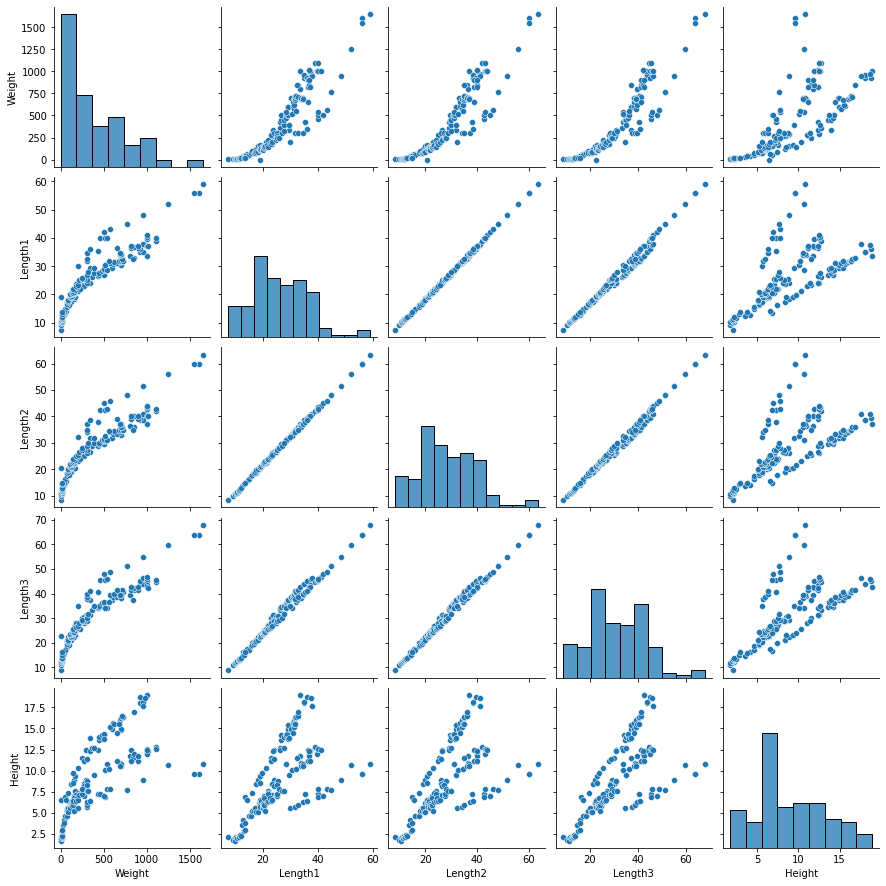

In [12]:
sns.pairplot(df.iloc[:, 0:5])
plt.show()

**Box plot dos gráficos para verificar de existe outliers**

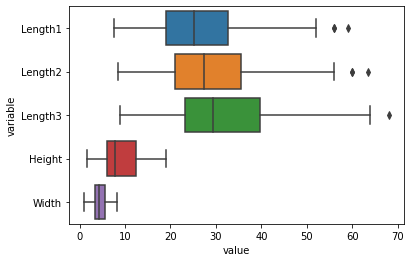

In [13]:
sns.boxplot(x = 'value', y = 'variable', data = df.drop(['Weight'], axis = 1).iloc[:, 0:5].melt())
plt.show()

Pelos bloxplot acima verificamos que existe outliers nas variáveis 'Length1', 'Length2' e 'Length3'.

Utilizamos o seguinte código para remover os outliers. Ou seja removemos os valores abaixo de $Q1 - 1.5 IQR$ e acima de $Q3 + 1.5 IQR$, para cada uma das variáveis.

In [14]:
for i in range(0, 6):
  name_column = df.columns[i]
  Q1 = df.describe().unstack()[name_column, '25%']
  Q3 = df.describe().unstack()[name_column, '75%']
  IQR = Q3 - Q1
  df_extra = np.array(df[name_column].values.tolist())
  df[name_column] = np.where(df_extra < Q1 - 1.5 * IQR, df.iloc[:, i].mean(), df_extra).tolist()
  df[name_column] = np.where(df_extra > Q3 + 1.5 * IQR, df.iloc[:, i].mean(), df_extra).tolist()

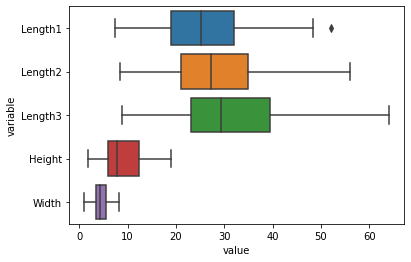

In [15]:
sns.boxplot(x = 'value', y = 'variable', data = df.drop(['Weight'], axis = 1).iloc[:, 0:5].melt())
plt.show()

Usando o boxplot conseguimos eliminar a maioria dos valores discrepantes (outliers) existentes. Em seguinda iremos aplciar os métodos de machine learning para realizar as análises.

#### **Selecionando as variáveis explicativas (features) mais significativas do modelo**

[Fonte](https://minerandodados.com.br/feature-selection-bala-de-prata/)

In [16]:
X = df.drop(['Weight'], axis = 1)
y = df['Weight']

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Length1    159 non-null    float64
 1   Length2    159 non-null    float64
 2   Length3    159 non-null    float64
 3   Height     159 non-null    float64
 4   Width      159 non-null    float64
 5   Bream      159 non-null    uint8  
 6   Parkki     159 non-null    uint8  
 7   Perch      159 non-null    uint8  
 8   Pike       159 non-null    uint8  
 9   Roach      159 non-null    uint8  
 10  Smelt      159 non-null    uint8  
 11  Whitefish  159 non-null    uint8  
dtypes: float64(5), uint8(7)
memory usage: 7.4 KB


#### **Normalizando as variáveis**

Normalizando as variáveis explicativas e variável resposta para os dados ficar na mesma escala.

In [18]:
X_bin = X.iloc[:, 5:12]
X_nbin = X.iloc[:, 0:5]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_nbin = pd.DataFrame(scaler.fit_transform(X_nbin.astype(np.float32)), columns = X_nbin.columns)

X = pd.concat([X_nbin, X_bin], axis = 1)

#### **Separando os dados em treinamento e teste**

Separamos os dados em 30% para teste e 70% para treinamento, considerando os dados não aleatórios na divisão.

In [20]:
# todas as colunas da base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = 'False', random_state = 376)

#### **Treinamento dos modelos**

Criando as listas onde salvaremos os resultados de tempo e acurácia.

In [21]:
acuracia_models = []
time_models = []

Usando o modelo de regressão linear dividindo os dados em treinamento e teste.

In [22]:
import statsmodels.api as sm
import numpy as np

model_reglinear = sm.OLS(y_train, X_train)
results = model_reglinear.fit()
y_pred = results.predict(X_test)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.97e-62
Time:                        18:26:25   Log-Likelihood:                -617.26
No. Observations:                 111   AIC:                             1259.
Df Residuals:                      99   BIC:                             1291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Length1     -195.5863    282.805     -0.692      0.491    -756.733     365.560
Length2      390.4545    290.863      1.342      0.183    -186.680     967.589
Length3       13.3704     22.899      0.584      0.561     -32.067      58.808
Height       133.1428     47.336      2.813      0.006      39.218     227.068
Width         70.7592     29.562      2.394      0.019      12.101     129.417
Bream        258.6568     49.231      5.254      0.000     160.972     356.342
Parkki       351.3557     34.867     10.077      0.000     282.173     420.538
Perch        388.5093     20.022     19.404      0.000     348.781     428.238
Pike         252.8701     48.004      5.268      0.000     157.620     348.121
Roach        360.0637     20.815     17.298      0.000     318.763     401.365
Smelt        694.5766     33.884     20.498      0.000     627.343     761.811
Whitefish    375.6568     29.613     12.685      0.000     316.897     434.416
==============================================================================
Omnibus:                        9.511   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.909
Skew:                           0.516   Prob(JB):                      0.00428
Kurtosis:                       4.137   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
print("O valor do coeficiente de determinação é {}.".format(round(results.rsquared, 4)))

O valor do coeficiente de determinação é 0.9566.


##### **Aplicando o modelo de regressão múltipla.**

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time
ini = time.time()

model = LinearRegression()
parameters = {'fit_intercept': [True, False], 'normalize': [True, False]}
grid = GridSearchCV(model, parameters, cv = 5)
grid.fit(X_train, y_train)

print("Melhores parâmetros: {}\n".format(grid.best_params_))

# print('Predição de novos dados')
resultado_rl = grid.predict(X_test)

ac = round(r2_score(y_test, resultado_rl), 4)
print('Avaliação do modelo - Coeficiente de Determinação (R^2): {}'.format(ac))
acuracia_models.append(ac)

fim = time.time()
print ("\nTempo de execução: {} minutos.".format(round((fim - ini) / 60, 4)))
time_models.append(round((fim - ini) / 60, 4))

Melhores parâmetros: {'fit_intercept': False, 'normalize': True}

Avaliação do modelo - Coeficiente de Determinação (R^2): 0.9173

Tempo de execução: 0.0015 minutos.


##### **Neste passo aplicamos o modelo de regressão polinomial.**

Verificando qual o melhor valor do grau do polinômio $p$.

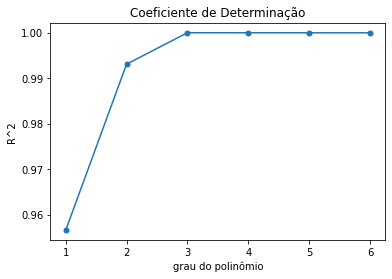

In [25]:
from sklearn.preprocessing import PolynomialFeatures
erro_r2 = []

for p in range(1, 7):
    poly = PolynomialFeatures(degree = p)
    Xp = poly.fit_transform(X_train)
    reg_poly = LinearRegression()
    reg_poly.fit(Xp, y_train)
    
    y_pred = reg_poly.predict(Xp)

    erro_r2.append(r2_score(y_train, y_pred))
    
plt.plot(range(1, len(erro_r2) + 1), erro_r2, marker = '.', ms = 10)
plt.xlabel('grau do polinômio')
plt.ylabel('R^2')
plt.title('Coeficiente de Determinação')
plt.show()

Pelo gráfico acima verificamos que o melhor grau de polinômio a se usar é $p = 2$, que tem mais ou menos $4\%$ a mais de acurácia.

In [26]:
import time
ini = time.time()

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
print(pol_reg.fit(X_poly, y_train))

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
coef_det = round(r2_score(y_test, y_pred), 4)
print('\nCoefiente de determinação: {}.'.format(coef_det))
acuracia_models.append(coef_det)

fim = time.time()
print ("\nTempo de execução: {} minutos.".format(round((fim - ini) / 60, 4)))
time_models.append(round((fim - ini) / 60, 4))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefiente de determinação: 0.9617.

Tempo de execução: 0.0003 minutos.


Concluímos, o melhor modelo polinomial foi o de grau $p = 2$, que teve uma acurácia de $96.17\%$.

Agora testamos o uso dos modelos de regressão com regularização, os modelos:
* Regressão Ridge;
* Regressão Lasso;
* Regressão ElasticNet.

##### **Análise usando Regressão Ridge**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import time

ini = time.time()
ridge = Ridge(random_state = 376)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20], 'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False'], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              'max_iter': [10000], 'tol': [1e-4]}
ridge_regressor = GridSearchCV(ridge, parameters, cv = 5, scoring = 'neg_mean_squared_error', )
ridge_regressor.fit(X_train, y_train)

print("Melhores parâmetros: {}\n".format(ridge_regressor.best_params_))

resultado_ridge = ridge_regressor.predict(X_test)

ac = round(r2_score(y_test, resultado_ridge), 4)
print('Avaliação do modelo - Coeficiente de Determinação (R^2): {}'.format(ac))
acuracia_models.append(ac)

fim = time.time()
print ("\nTempo de execução: {} minutos.".format(round((fim - ini) / 60, 4)))
time_models.append(round((fim - ini) / 60, 4))

Melhores parâmetros: {'alpha': 0.01, 'fit_intercept': 'True', 'max_iter': 10000, 'normalize': 'True', 'solver': 'saga', 'tol': 0.0001}

Avaliação do modelo - Coeficiente de Determinação (R^2): 0.917

Tempo de execução: 0.2932 minutos.


##### **Análise usando Regressão Lasso**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import time

ini = time.time()
lasso = Lasso(random_state = 376)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20], 'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False'], 'max_iter': [10000], 'tol': [1e-4]}
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5, scoring='neg_mean_squared_error')
lasso_regressor.fit(X_train, y_train)

print("Melhores parâmetros: {}\n".format(lasso_regressor.best_params_))

resultado_lasso = lasso_regressor.predict(X_test)

ac = round(r2_score(y_test, resultado_lasso), 4)
print('Avaliação do modelo - Coeficiente de Determinação (R^2): {}'.format(ac))
acuracia_models.append(ac)

fim = time.time()
print ("\nTempo de execução: {} minutos.".format(round((fim - ini) / 60, 4)))
time_models.append(round((fim - ini) / 60, 4))

Melhores parâmetros: {'alpha': 0.01, 'fit_intercept': 'True', 'max_iter': 10000, 'normalize': 'True', 'tol': 0.0001}

Avaliação do modelo - Coeficiente de Determinação (R^2): 0.9173

Tempo de execução: 0.0569 minutos.


##### **Análise usando Regressão ElasticNet**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import time

ini = time.time()
elasticnet = ElasticNet(random_state = 376)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20], 'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False'], 'max_iter': [10000], 'tol': [1e-4],
              'l1_ratio': [0.0, 0.5, 1.0, 1.5, 2.0]}
elasticnet_regressor = GridSearchCV(elasticnet, parameters, cv = 5, scoring='neg_mean_squared_error')
elasticnet_regressor.fit(X_train, y_train)

print("Melhores parâmetros: {}\n".format(elasticnet_regressor.best_params_))

resultado_elasticnet = elasticnet_regressor.predict(X_test)

ac = round(r2_score(y_test, resultado_elasticnet), 4)
print('Avaliação do modelo - Coeficiente de Determinação (R^2): {}'.format(ac))
acuracia_models.append(ac)

fim = time.time()
print ("\nTempo de execução: {} minutos.".format(round((fim - ini) / 60, 4)))
time_models.append(round((fim - ini) / 60, 4))

Melhores parâmetros: {'alpha': 0.001, 'fit_intercept': 'True', 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': 'True', 'tol': 0.0001}

Avaliação do modelo - Coeficiente de Determinação (R^2): 0.9173

Tempo de execução: 0.3365 minutos.


Também testamos outros modelos que são usados para classificação, mas possuem sua versão para regerssão. Os modelos usados foram
* Nearest Neighbors Regression - KNN;
* Random Forest;
* Árvore de Decisão;
* Máquina de Vetor Suporte (SVM).

##### **Modelo Nearest Neighbors Regression - KNN para regressão**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import time

ini = time.time()
# Lista de hiperparâmetros para tunar
tuned_parameters = [
    [{'n_neighbors': list(range(1, 15)), 'metric': ['euclidean', 'manhattan', 'minkowski'],
        'p': [1, 2], 'weights': ['uniform', 'distance']}]
]

regressor = GridSearchCV(KNeighborsRegressor(), tuned_parameters[0], cv = 5)
regressor.fit(X_train, y_train.astype('int'))
y_pred = regressor.predict(X_test)

print("Melhores parâmetros: ")
print(regressor.best_params_)

coef_det = round(r2_score(y_test, y_pred), 4)
print('\nCoefiente de determinação: {}.'.format(coef_det))
acuracia_models.append(coef_det)

fim = time.time()
print ("Tempo de execução: {} minutos.".format(round((fim - ini) / 60, 4)))
time_models.append(round((fim - ini) / 60, 4))

Melhores parâmetros: 
{'metric': 'euclidean', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}

Coefiente de determinação: 0.9514.
Tempo de execução: 0.0583 minutos.


##### **Modelo Random Forest para regressão**

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import time

ini = time.time()
# Lista de hiperparâmetros para tunar
tuned_parameters = [
    [{'criterion': ['mse', 'mae'], 'max_depth': [5, 20, 50], 'max_features': ['auto', 'sqrt'],
      'min_samples_split': [2, 4], 'min_samples_leaf': [1, 5]}]
]

rf_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters[0], cv = 5)
rf_regressor.fit(X_train, y_train.astype('int'))
y_pred = rf_regressor.predict(X_test)

print("Melhores parâmetros: ")
print(rf_regressor.best_params_)

coef_det = round(r2_score(y_test, y_pred), 4)
print('\nCoefiente de determinação: {}.'.format(coef_det))
acuracia_models.append(coef_det)

fim = time.time()
print ("Tempo de execução: {} minutos.".format(round((fim - ini) / 60, 4)))
time_models.append(round((fim - ini) / 60, 4))

Melhores parâmetros: 
{'criterion': 'mse', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

Coefiente de determinação: 0.957.
Tempo de execução: 0.6044 minutos.


##### **Árvore de Decisão para regressão**

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import time

ini = time.time()
# Lista de hiperparâmetros para tunar
tuned_parameters = [
    [{'criterion': ['mse', 'mae'], 'max_depth': list(range(1, 50)), 'splitter': ['best', 'random'],
      'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [1, 5, 10]}]
]

ad_regressor = GridSearchCV(DecisionTreeRegressor(random_state = 376), tuned_parameters[0], cv = 5)
ad_regressor.fit(X_train, y_train.astype('int'))
y_pred = ad_regressor.predict(X_test)

print("Melhores parâmetros: ")
print(ad_regressor.best_params_)

coef_det = round(r2_score(y_test, y_pred), 4)
print('\nCoefiente de determinação: {}.'.format(coef_det))
acuracia_models.append(coef_det)

fim = time.time()
print ("Tempo de execução: {} minutos.".format(round((fim - ini) / 60, 4)))
time_models.append(round((fim - ini) / 60, 4))

Melhores parâmetros: 
{'criterion': 'mae', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'splitter': 'best'}

Coefiente de determinação: 0.9581.
Tempo de execução: 0.4876 minutos.


In [33]:
extra = ad_regressor

In [34]:
# Renderizando a árvore de forma gráfica:
!pip install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot
import graphviz

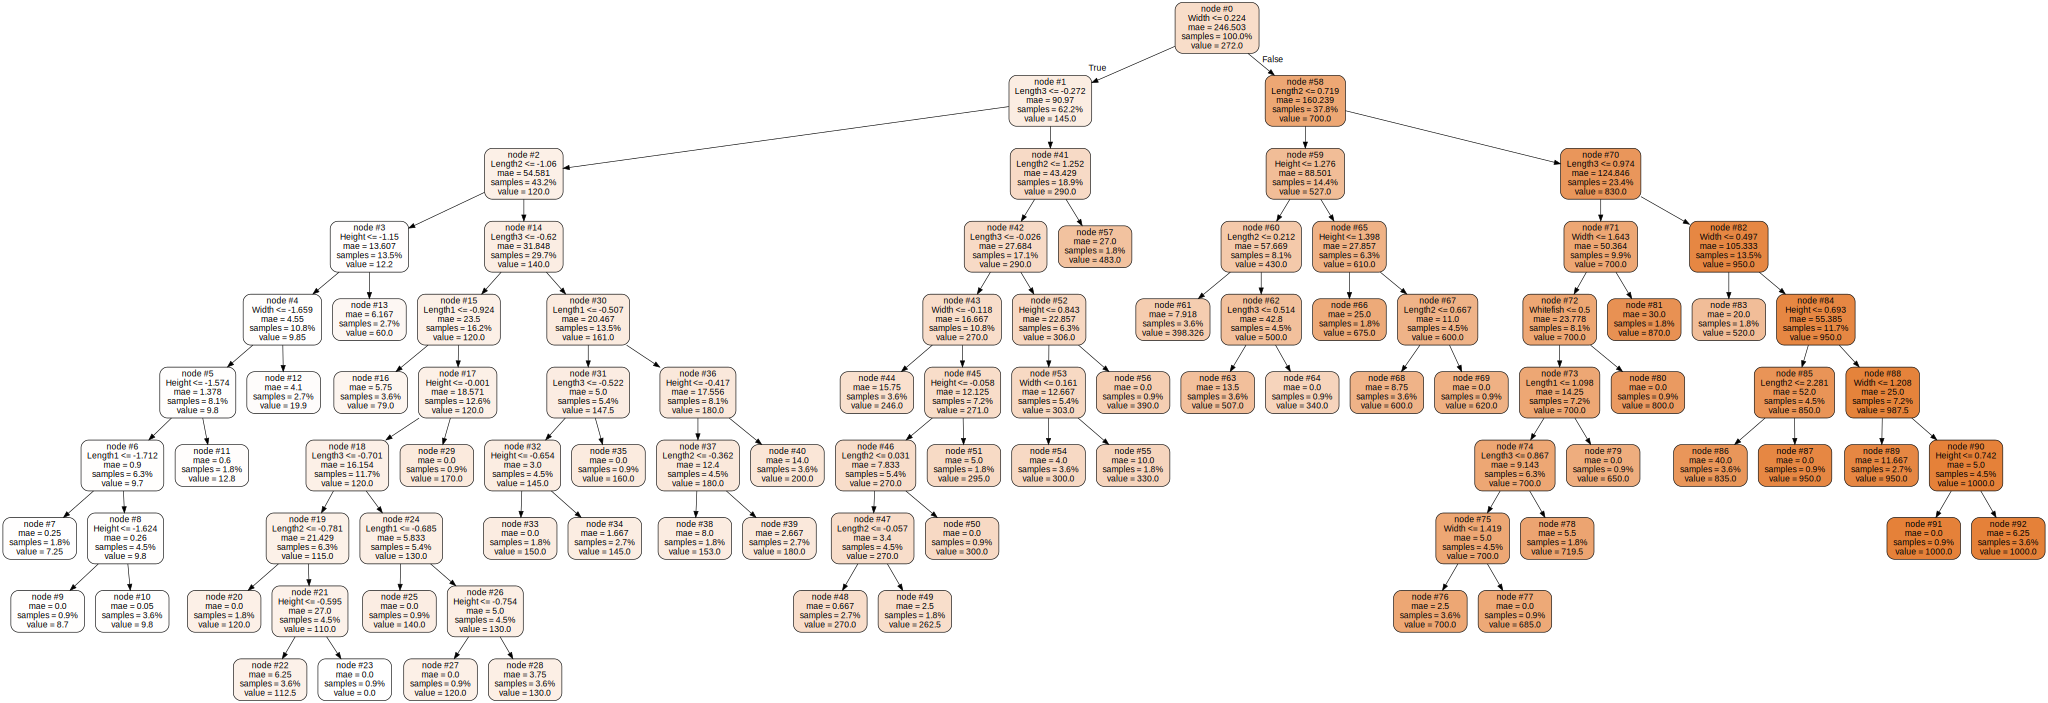

In [35]:
import sklearn
ad_regressor = DecisionTreeRegressor(criterion = 'mae', max_depth = 9, max_features = 'auto', min_samples_split = 5, splitter = 'best')
ad_regressor.fit(X_train, y_train)
dot_data = sklearn.tree.export_graphviz(ad_regressor,
                                        out_file = None,
                                        class_names = y.unique(),
                                        filled = True, rounded=True,
                                        proportion = True,
                                        node_ids = True,
                                        rotate = False,
                                        label = 'all',
                                        feature_names = X.columns)

graph = graphviz.Source(dot_data)
graph

##### **Modelo SVM para regressão**

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import time

ini = time.time()
# Lista de hiperparâmetros para tunar
tuned_parameters = [
    [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 3, 5], 'gamma': ['scale', 'auto'],
        'C': [0.001, 0.1, 1, 10, 100], 'tol': [1e-4]}]
]

svm_regressor = GridSearchCV(SVR(), tuned_parameters[0], cv = 5)
svm_regressor.fit(X_train, y_train.astype('int'))
y_pred = svm_regressor.predict(X_test)

print("Melhores parâmetros: ")
print(svm_regressor.best_params_)

coef_det = round(r2_score(y_test, y_pred), 4)
print('\nCoefiente de determinação: {}.'.format(coef_det))
acuracia_models.append(coef_det)

fim = time.time()
print ("Tempo de execução: {} minutos.".format(round((fim - ini) / 60, 4)))
time_models.append(round((fim - ini) / 60, 4))

Melhores parâmetros: 
{'C': 100, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.0001}

Coefiente de determinação: 0.9241.
Tempo de execução: 0.0442 minutos.


#### **Resultados obtidos**

A seguir são apresentados, numa tabela, os resultados obtidos para comparação

In [37]:
name_models = ['Regressão Múltipla', 'Regressão Polinomial de grau (p = 2)', 'Regressão Ridge',
               'Regressão Lasso', 'Regressão ElasticNet', 'Nearest Neighbors Regression',
               'Random Forest (para regressão)', 'Árvore de Decisão (para regressão)', 'Máquina de Vetor Suporte']

results = {'Métodos': name_models, 'Acurácia': acuracia_models, 'Tempo': time_models}
results = pd.DataFrame(results)
results.sort_values(['Acurácia', 'Tempo'], ascending = [False, True])

,Métodos,Acurácia,Tempo
1,Regressão Polinomial de grau (p = 2),0.9617,0.0003
7,Árvore de Decisão (para regressão),0.9581,0.4876
6,Random Forest (para regressão),0.9570,0.6044
5,Nearest Neighbors Regression,0.9514,0.0583
8,Máquina de Vetor Suporte,0.9241,0.0442
0,Regressão Múltipla,0.9173,0.0015
3,Regressão Lasso,0.9173,0.0569
4,Regressão ElasticNet,0.9173,0.3365
2,Regressão Ridge,0.9170,0.2932


Após a análise descritiva eliminando os valores outliers e usando nove métodos de machine learning obtemos que o melhor modelo foi a Regressão Polinomial de grau (p = 2), que teve uma acurácia de $96.17\%$ com um tempo computacional de $0.0003$ minutos (esse tempo pode variar um pouco cada vez que roda os modelos novamente). Apesar disso, o modelo árvore de decisão (para regressão) teve um resultado perto com acurácia de $95.81\%$ com tempo computacional de $0.4876$ minutos.

Por último fazemos a predição do peso de dois novos peixes.

In [38]:
novos_peixes = np.array([[1.541629, 1.502657, 1.362728, 0.501158, 0.5680, 0, 1, 0, 0, 0, 0, 0], [-1.055301, 2.682057, -0.573028, 0.112687, 1.5684, 0, 0, 0, 0, 0, 0, 1]])
print("Novos peixes, dados: \n{}".format(novos_peixes))
pred = regressor.predict(novos_peixes)
print('\nPredição do peso de novos peixes: {}'.format(np.round(pred, 4)))

Novos peixes, dados: 
[[ 1.541629  1.502657  1.362728  0.501158  0.568     0.        1.
   0.        0.        0.        0.        0.      ]
 [-1.055301  2.682057 -0.573028  0.112687  1.5684    0.        0.
   0.        0.        0.        0.        1.      ]]

Predição do peso de novos peixes: [595.3968 666.6862]
